In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
TRAIN_DF_PATH = '../data/train.csv'

In [4]:
train_df = pd.read_csv(TRAIN_DF_PATH)
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [5]:
no_of_grapheme_root = np.unique(train_df['grapheme_root']).shape[0]
print(no_of_grapheme_root)

168


In [6]:
no_of_vowel_diacritic = np.unique(train_df['vowel_diacritic']).shape[0]
print(no_of_vowel_diacritic)

11


In [7]:
no_of_consonant_diacritic = np.unique(train_df['consonant_diacritic']).shape[0]
print(no_of_consonant_diacritic)

7


In [8]:
data_files = os.listdir('../data')
print(data_files)

['class_map.csv', 'sample_submission.csv', 'test.csv', 'test_image_data_0.parquet', 'test_image_data_1.parquet', 'test_image_data_2.parquet', 'test_image_data_3.parquet', 'train.csv', 'train_image_data_0.parquet', 'train_image_data_1.parquet', 'train_image_data_2.parquet', 'train_image_data_3.parquet']


In [9]:
train_data = []
for data_file in data_files:
    if 'train_image' in data_file:
        train_data.append(data_file)
print(train_data)

['train_image_data_0.parquet', 'train_image_data_1.parquet', 'train_image_data_2.parquet', 'train_image_data_3.parquet']


In [15]:
parquet = pd.read_parquet(os.path.join('../data', 'train_image_data_0.parquet'))
parquet.head()

KeyError: "['image_id'] not found in axis"

In [22]:
parquet = parquet.drop(['image_id'], axis=1)

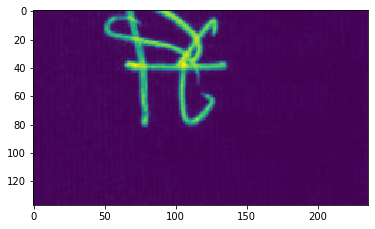

In [50]:
train_image = list(parquet.iloc[3])

train_image = np.asarray(train_image)
train_image = 255 - train_image
train_image.resize((137, 236))
plt.imshow(train_image)

In [51]:
def crop_image_from_gray(img,tol=10):
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

In [52]:
import cv2

In [53]:
train_image = crop_image_from_gray(train_image)
train_image = cv2.resize(train_image.astype(np.uint8), (64, 64))

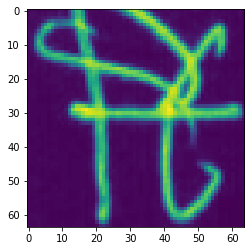

In [54]:
plt.imshow(train_image)